In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [85]:
def gen_data(n_sample=50,dist='uniform',random_var=0):
    """
    Generates data points for a desired distributions and return as numpy array
    """
    
    if dist=='uniform':
        d=np.random.random(size=n_sample)
    if dist=='normal':
        d=np.random.normal(loc=1-random_var,scale=1+random_var,size=n_sample)
    if dist=='binomial':
        d=np.random.binomial(n=10,p=0.5+random_var/10,size=n_sample)
    if dist=='exponential':
        d=np.random.exponential(scale=0.5+random_var,size=n_sample)
    if dist=='poisson':
        d=np.random.poisson(lam=1.0+random_var,size=n_sample)
    if dist=='chisquare':
        d=np.random.chisquare(df=3+int(5*random_var),size=n_sample)
    if dist=='gamma':
        d=np.random.gamma(shape=1.0+random_var,scale=0.5+random_var,size=n_sample)
    if dist=='beta':
        d=np.random.beta(a=0.5+random_var,b=1.0+random_var,size=n_sample)
    if dist=='triangular':
        d=np.random.triangular(left=0.0,mode=np.min([0.5+random_var,1.0]),right=1.0,size=n_sample)
    if dist=='lognormal':
        d=np.random.lognormal(mean=1-random_var,sigma=1+random_var,size=n_sample)
    if dist=='laplace':
        d=np.random.laplace(scale=0.5+random_var,size=n_sample)
        
    # Normalize data
    d = d+np.abs(d.min())
    d = d/(d.max()-d.min())
    
    return d

### Kernel density plots and histograms to test the generative function

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:330: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  ax.plot(x, y, color=color, label=label, **kwargs)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:330: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  ax.plot(x, y, color=color, label=label, **kwargs)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:330: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  ax.plot(x, y, color=color, label=label, **kwargs)
/usr/local/lib/python3.6/dist-packages/seaborn/di

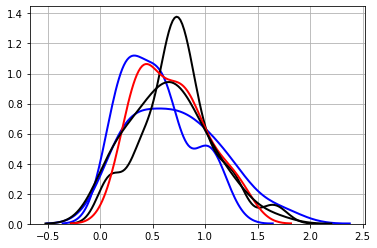

In [86]:
for r in [0.1,0.2,0.3,0.4,0.5]:
    test=gen_data(dist='beta',random_var=r)+gen_data(dist='exponential',random_var=r)
    sns.kdeplot(test,lw=2,c=np.random.choice(['k','orange','blue','green','red']))
    plt.grid(True)
plt.show()

In [87]:
dist_list=['uniform','normal','binomial','exponential','poisson','chisquare','gamma','beta','triangular','lognormal','laplace']

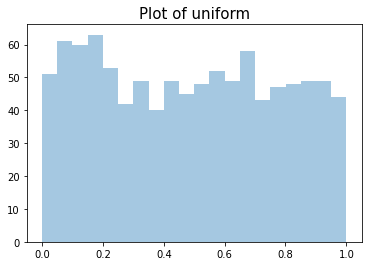

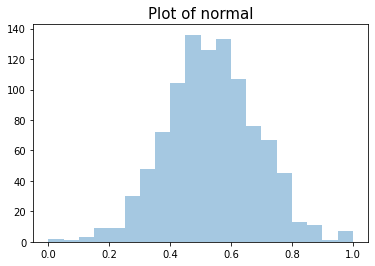

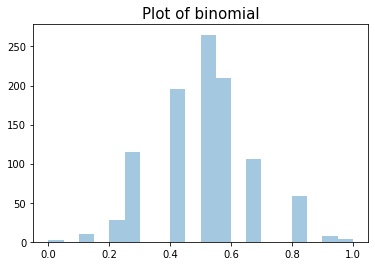

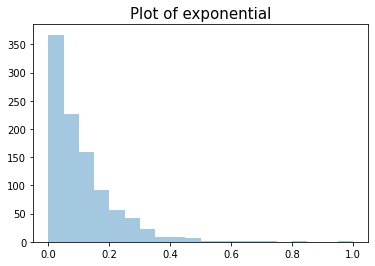

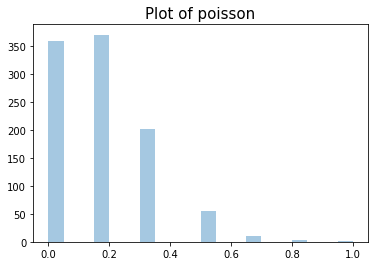

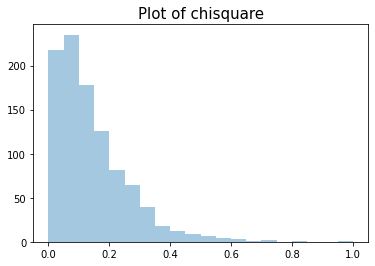

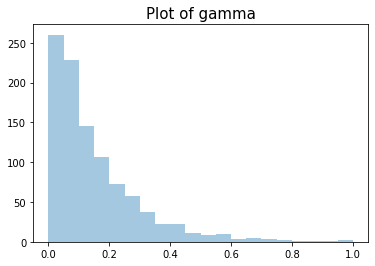

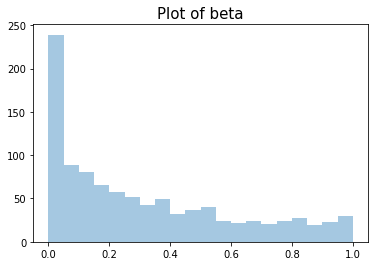

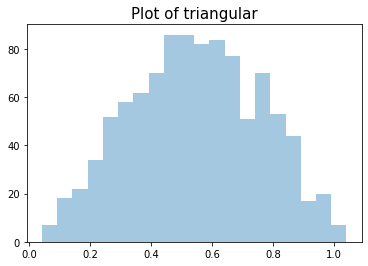

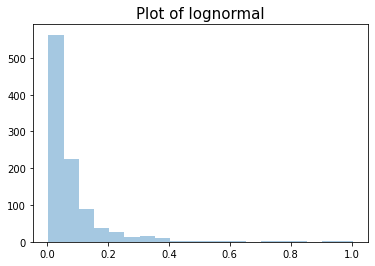

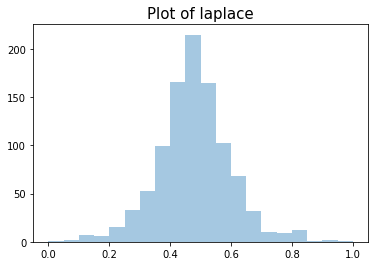

In [88]:
for d in dist_list:
    data = gen_data(n_sample=1000,dist=d)
    plt.title(f"Plot of {d}",fontsize=15)
    sns.distplot(data,kde=False,bins=20)
    plt.show()

In [104]:
def gen_dist_df(n_input=5,n_sample=200,bins=10):
    """
    Generates randomized data sets calling gen_data with various distributions and put them in a DataFrame
    """
    import pandas as pd
    
    df_data={}
    df_data['Data']=[]
    df_data['Histogram']=[]
    df_data['Type']=[]
    dist_list=['uniform','normal','binomial','exponential','poisson','chisquare',\
               'gamma','beta','triangular','lognormal','laplace']
    for i in range(n_input):
        r=np.random.random()
        dist=np.random.choice(dist_list)
        d=gen_data(n_sample=n_sample,dist=dist,random_var=r)
        d=d.reshape(n_sample,)
        df_data['Data'].append(d)
        # Add histogram bin array after range scaling
        hist=np.histogram(d,bins=bins)[0]
        bins=len(hist)
        hist=(hist-hist.min())/(hist.max()-hist.min())
        # Reshape for proper input dimension to the NN
        hist=hist.reshape(bins,)
        df_data['Histogram'].append(hist)
        df_data['Type'].append(dist)
        
    df_data=pd.DataFrame(df_data)
        
    return df_data

In [90]:
n_input=1000
n_sample=500
n_bins=25
n_class=11

In [91]:
df=gen_dist_df(n_input=n_input,n_sample=n_sample,bins=n_bins)

In [92]:
df.head()

,Data,Histogram,Type
0,"[0.5019332810971551, 0.6164937824242508, 0.452...","[0.05714285714285714, 0.11428571428571428, 0.0...",triangular
1,"[0.1521181429244096, 0.034584063121356895, 0.0...","[1.0, 0.5, 0.21074380165289255, 0.115702479338...",lognormal
2,"[0.8888888888888888, 0.5555555555555556, 0.666...","[0.007142857142857143, 0.0, 0.0571428571428571...",binomial
3,"[0.15743824307307666, 0.6960304436597597, 0.31...","[0.017857142857142856, 0.03571428571428571, 0....",normal
4,"[0.5292755019852715, 0.7050939996208087, 0.570...","[0.043478260869565216, 0.0, 0.0869565217391304...",normal


In [93]:
df['Data'][0].shape

(500,)

In [105]:
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [95]:
y=df['Type']
num_classes = len(df['Type'].unique())
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)
y = keras.utils.to_categorical(encoded_y,num_classes=num_classes)

In [96]:
X=[]
for i in range(n_input):
    X.append(df['Histogram'][i])

In [97]:
X=np.array(X)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [99]:
X_train[:5]

array([[1.        , 0.70542636, 0.54263566, 0.34108527, 0.35658915,
        0.23255814, 0.20155039, 0.1627907 , 0.06976744, 0.10077519,
        0.06976744, 0.02325581, 0.01550388, 0.        , 0.01550388,
        0.00775194, 0.00775194, 0.00775194, 0.        , 0.        ,
        0.00775194, 0.        , 0.        , 0.        , 0.00775194],
       [0.00714286, 0.        , 0.05714286, 0.        , 0.        ,
        0.26428571, 0.        , 0.        , 0.48571429, 0.        ,
        0.        , 0.68571429, 0.        , 1.        , 0.        ,
        0.        , 0.62142857, 0.        , 0.        , 0.3       ,
        0.        , 0.        , 0.14285714, 0.        , 0.00714286],
       [0.46666667, 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.91333333, 0.        ,
        0.        , 0.        , 0.56666667, 0.        , 0.        ,
        0.        , 0.23333333, 0.        , 0.        , 0.        ,
        0.1       , 0.        , 0.        , 0.

In [100]:
y_train[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [101]:
input_dim=X.shape[1]
output_dim=num_classes

In [102]:
def build_NN_model(input_dim,num_classes,n_hidden_layers=1,layer_architecture=None,dropout_prob=0.25,activation_func='relu'):
    """
    Builds and returns a feed-forward multi-layer neural network
    n_hidden_layers: Number of hidden layers
    layer_architecture: Nuerons per hidden layer, must be a list with neurons per layer
                        e.g. [10,5] and length must match the number of layers
    """
    model = Sequential()
    model.add(Dense(layer_architecture[0], input_shape=(input_dim,),activation='relu'))
    if len(layer_architecture)>1:
        for i in layer_architecture[1:]:
            model.add(Dense(i, activation='relu'))
            model.add(Dropout(rate=dropout_prob))
    model.add(Dense(num_classes, activation='softmax'))
    #print(model.summary())
    return model

In [103]:
model=build_NN_model(input_dim=input_dim,n_hidden_layers=2,layer_architecture=[10,10])

TypeError: ignored

In [ ]:
#neuron_layer_1=20
#neuron_layer_2=10
#dropout_prob=0.25
#activation_func='relu'
num_epochs=200
batch_size=32
learning_rate=0.001

In [ ]:
optimizer=keras.optimizers.adam(lr=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint   

# save best model as checkpointer
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=0, 
                               save_best_only=True)
# train the model
hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs,
          validation_data=(X_val, y_val), callbacks=[checkpointer], 
          verbose=1, shuffle=False)

In [ ]:
model.load_weights('model.weights.best.hdf5')
score = model.evaluate(X_test, y_test,verbose=0)
print("Test score: ", score[1])

In [ ]:
plt.plot(hist.history['val_loss'],color='k')
plt.title("Validation set loss",fontsize=15)
plt.grid(True)
plt.xlabel("Epochs",fontsize=14)
plt.show()

In [ ]:
plt.plot(hist.history['val_acc'],color='k')
plt.title("Validation set accuracy",fontsize=15)
plt.grid(True)
plt.xlabel("Epochs",fontsize=14)
plt.show()

In [ ]:
hist.params

In [ ]:
bin_estimators=[10,20,50,'fd','scott','doane','rice','sturges','sqrt']

In [ ]:
def prepare_input(df):
    y=df['Type']
    num_classes = len(df['Type'].unique())
    encoder = LabelEncoder()
    encoder.fit(y)
    encoded_y = encoder.transform(y)
    # convert integers to dummy variables (i.e. one hot encoded)
    dummy_y = np_utils.to_categorical(encoded_y)
    y = keras.utils.to_categorical(encoded_y,num_classes=num_classes)
    
    X=[]
    for i in range(n_input):
        X.append(df['Histogram'][i])
    X=np.array(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)
    input_dim=X.shape[1]
    
    return (X,y,X_train,y_train,X_test,y_test,X_val,y_val,input_dim,num_classes)

In [ ]:
def make_NN_model(input_dim, num_classes, n_hidden_layers=2,layer_architecture=[5,5],
                  dropout_prob=0.25,activation_func='relu', learning_rate=0.01):
    """
    Builds a neural net model, assigns an optimizer, and compiles the model for running
    """
    model = build_NN_model(input_dim=input_dim,num_classes=num_classes,n_hidden_layers=n_hidden_layers,
                          layer_architecture=layer_architecture,dropout_prob=dropout_prob,activation_func=activation_func)    
    
    optimizer=keras.optimizers.adam(lr=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])
    
    return model

In [ ]:
def run_NN(model,X_train,y_train,X_val,y_val,num_epochs=100,batch_size=32,plot_loss=False):
    """
    Runs a given model, saves best model/weight as checkpoint, and plots validation set loss if user wants
    Returns the history object
    """
    # save best model as checkpointer
    checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=0, 
                                   save_best_only=True)
    # train the model
    hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs,
              validation_data=(X_val, y_val), callbacks=[checkpointer], 
              verbose=0, shuffle=False)
    
    if plot_loss:
        plt.plot(hist.history['val_acc'],color='k')
        plt.title("Validation set accuracy",fontsize=15)
        plt.grid(True)
        plt.xlabel("Epochs",fontsize=14)
        plt.show()
    
    return hist

In [ ]:
n_input=500
n_sample=300

In [ ]:
test_score={}
for b in bin_estimators:
    df=gen_dist_df(n_input=n_input,n_sample=n_sample,bins=b)
    #print(df['Histogram'][0].shape)
    X,y,X_train,y_train,X_test,y_test,X_val,y_val,input_dim,num_classes=prepare_input(df)
    #print(len(X[0]))
    model=make_NN_model(input_dim=input_dim,num_classes=num_classes,n_hidden_layers=2,layer_architecture=[20,20],
                        learning_rate=0.01)
    hist=run_NN(model,X_train=X_train,y_train=y_train,X_val=X_val,y_val=y_val,num_epochs=300)
    score=model.evaluate(X_test, y_test,verbose=0)[1]
    test_score[str(b)]=score
    plt.plot(hist.history['val_acc'],color='k')
    plt.title(f"Validation set accuracy for: {b}",fontsize=15)
    plt.grid(True)
    plt.xlabel("Epochs",fontsize=14)
    plt.show()
    print(f"Finished evaluation of {b}")
print()
print(test_score)

In [ ]:
n_input=500
n_sample=1000

In [ ]:
bin_size=[i*5 for i in range(1,31)]
test_score=[]
for b in bin_size:
    df=gen_dist_df(n_input=n_input,n_sample=n_sample,bins=b)
    #print(df['Histogram'][0].shape)
    X,y,X_train,y_train,X_test,y_test,X_val,y_val,input_dim,num_classes=prepare_input(df)
    #print(len(X[0]))
    model=make_NN_model(input_dim=input_dim,num_classes=num_classes,n_hidden_layers=2,
                        layer_architecture=[20,20],learning_rate=0.01)
    hist=run_NN(model,X_train=X_train,y_train=y_train,X_val=X_val,y_val=y_val,num_epochs=300)
    score=model.evaluate(X_test, y_test,verbose=0)[1]
    test_score.append(score)
    print("Done for bin size: ", b)
print()
test_score=np.array(test_score)
bin_size=np.array(bin_size)

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(bin_size,test_score*100,color='k',marker='o')
plt.title("Test set accuracy (correctly identifying the distribution)\n for various bin sizes of the histogram",fontsize=18)
plt.grid(True)
plt.xlabel("Bin size",fontsize=15)
plt.ylabel("Accuracy (%) of the test set",fontsize=15)
plt.ylim(0,100)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()